# Machine Learning Model for Edge Computing on Raspberry Pi 5

# Michael J Evan
## University of Massachusetts Dartmouth
## Graduate Department of Computer Science
### CIS-600 Masters Project Spring 2025

![Robot Photo](Robot_Photo.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score, accuracy_score
from sklearn.linear_model import LinearRegression

In [2]:
warnings.filterwarnings('ignore')  # filter out nusance warnings

In [3]:
robotdf_2 = pd.read_csv('robot_data_final.csv')


In [4]:
robotdf_2.shape

(4925, 6)

In [5]:
robotdf_2.head(50)

,timestamp,joystick_throttle,joystick_direction,distance_L,distance_C,distance_R
0,1.744230e+09,-0.2,0.01,245.41,497.17,232.70
1,1.744230e+09,-0.4,0.01,296.89,496.64,232.17
2,1.744230e+09,-0.6,0.01,249.67,501.21,240.71
3,1.744230e+09,-0.7,0.01,249.79,495.98,232.62
4,1.744230e+09,-0.9,0.01,250.81,498.19,249.09
5,1.744230e+09,-1.0,0.01,260.99,459.63,452.60
6,1.744230e+09,-1.0,0.20,269.99,391.43,1383.14
7,1.744230e+09,-1.0,0.74,357.08,961.99,434.61
8,1.744230e+09,-1.0,0.01,260.58,1597.08,1623.08
9,1.744230e+09,-1.0,-0.09,254.66,1490.64,1641.89


In [6]:
robotdf_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4925 entries, 0 to 4924
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           4925 non-null   float64
 1   joystick_throttle   4925 non-null   float64
 2   joystick_direction  4925 non-null   float64
 3   distance_L          4925 non-null   float64
 4   distance_C          4925 non-null   float64
 5   distance_R          4925 non-null   float64
dtypes: float64(6)
memory usage: 231.0 KB


In [7]:
robotdf_2.describe()

,timestamp,joystick_throttle,joystick_direction,distance_L,distance_C,distance_R
count,4.925000e+03,4925.000000,4925.000000,4925.00000,4925.000000,4925.000000
mean,1.744232e+09,-0.998254,0.041907,330.18811,905.103202,482.223038
std,1.077157e+03,0.030977,0.225962,265.25800,373.555232,515.762893
min,1.744230e+09,-1.000000,-1.000000,41.26000,197.080000,11.780000
25%,1.744230e+09,-1.000000,0.000000,204.28000,608.300000,177.010000
50%,1.744232e+09,-1.000000,0.010000,261.85000,892.280000,227.460000
75%,1.744233e+09,-1.000000,0.040000,336.06000,1170.520000,691.880000
max,1.744233e+09,-0.200000,1.000000,1796.53000,2404.590000,6293.440000


# Null Value check

In [8]:
ts = robotdf_2['timestamp'].isnull().sum()
th = robotdf_2['joystick_throttle'].isnull().sum()
js = robotdf_2['joystick_direction'].isnull().sum()
dl = robotdf_2['distance_L'].isnull().sum()
dc = robotdf_2['distance_C'].isnull().sum()
dr = robotdf_2['distance_R'].isnull().sum()
print('Null value check for timestamp and distance data:')
print()
print(f'timestamp:{ts}\nthrottle:{th}\njoystick:{js}\ndistance_L:{dl}\ndistance_C:{dc}\ndistance_R:{dr}')

Null value check for timestamp and distance data:

timestamp:0
throttle:0
joystick:0
distance_L:0
distance_C:0
distance_R:0


# df Scatter Plot

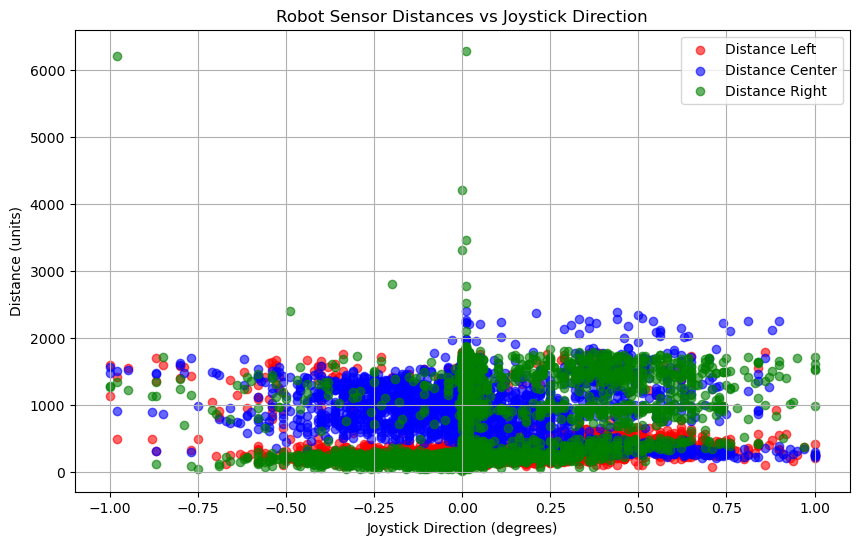

In [9]:
# Create scatter plot
plt.figure(figsize=(10, 6))

plt.scatter(robotdf_2['joystick_direction'], robotdf_2['distance_L'], color='red', label='Distance Left', alpha=0.6)
plt.scatter(robotdf_2['joystick_direction'], robotdf_2['distance_C'], color='blue', label='Distance Center', alpha=0.6)
plt.scatter(robotdf_2['joystick_direction'], robotdf_2['distance_R'], color='green', label='Distance Right', alpha=0.6)

plt.title('Robot Sensor Distances vs Joystick Direction')
plt.xlabel('Joystick Direction (degrees)')
plt.ylabel('Distance (units)')
plt.legend()
plt.grid()
plt.show()

# Correlation Matrix

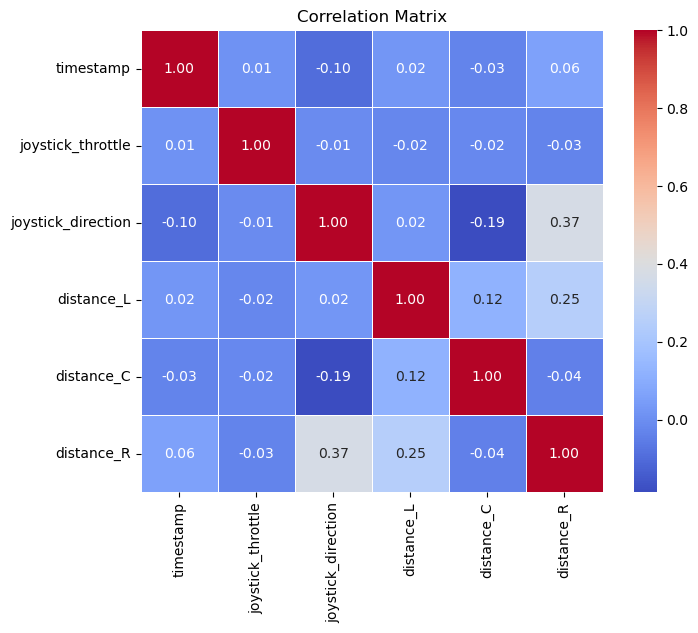

In [10]:
# Calculate the correlation matrix
correlation_matrix = robotdf_2.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Linear Regression Model

In [11]:
LR_testdata = robotdf_2.copy()

In [12]:
LR_testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4925 entries, 0 to 4924
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           4925 non-null   float64
 1   joystick_throttle   4925 non-null   float64
 2   joystick_direction  4925 non-null   float64
 3   distance_L          4925 non-null   float64
 4   distance_C          4925 non-null   float64
 5   distance_R          4925 non-null   float64
dtypes: float64(6)
memory usage: 231.0 KB


Mean Squared Error: 0.045139321851099735
Mean Absolute Error: 0.13528325102204217
R^2 Score: 0.2089613130756096

Sample Predictions vs Actual Values:
Predicted: 0.1323, Actual: 0.0100
Predicted: -0.0043, Actual: -0.2500
Predicted: 0.1762, Actual: 0.0100
Predicted: -0.0260, Actual: 0.0000
Predicted: 0.0047, Actual: -0.4700
Predicted: 0.0301, Actual: 0.0200
Predicted: -0.0060, Actual: 0.0000
Predicted: 0.0098, Actual: 0.0600
Predicted: 0.0186, Actual: 0.0000
Predicted: -0.0622, Actual: 0.0000


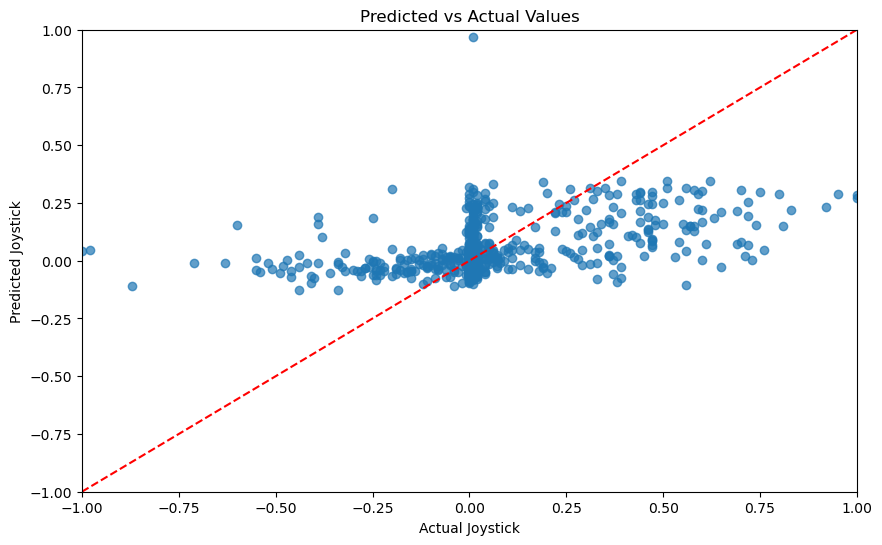

                    joystick_throttle  distance_L  distance_C  distance_R  \
joystick_throttle            1.000000   -0.021719   -0.017307   -0.030529   
distance_L                  -0.021719    1.000000    0.124004    0.252865   
distance_C                  -0.017307    0.124004    1.000000   -0.041220   
distance_R                  -0.030529    0.252865   -0.041220    1.000000   
joystick_direction          -0.006743    0.023157   -0.186533    0.372480   

                    joystick_direction  
joystick_throttle            -0.006743  
distance_L                    0.023157  
distance_C                   -0.186533  
distance_R                    0.372480  
joystick_direction            1.000000  


In [13]:


# Define features and target

X = LR_testdata.drop('joystick_direction', axis=1) # Features (input variable)
y = LR_testdata['joystick_direction'] # target vaiable

#####  features with and without timestamp & joiystick_throttle columns can be run
#features = LR_testdata[['joystick_throttle','distance_L', 'distance_C', 'distance_R']]
#features = LR_testdata[['distance_L', 'distance_C', 'distance_R']]
#features = LR_testdata[['distance_L', 'distance_C']]
#my_target = LR_testdata['joystick_direction']  # column to be excluded from X_test, y_test -->will only contain features

# Split data into training and test sets\
# my_target indicates column to predict based on value from X_test for joystick_direction to drive the robot
# y_train holds joystick_direction values for the training sample
# y_test stores the original joystick_direction values for portion of df set aside for testing
# X_train, X_test, y_train, y_test = train_test_split(features, my_target, test_size=0.2, random_state=42)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

y_pred = LR_model.predict(X_test)

# Evaluate the model by comparing:
# actual joystick_direction(y_test) with predicted y_pred values
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Output predictions vs actual values
print("\nSample Predictions vs Actual Values:")
for i in range(min(10, len(y_pred))):  # Print the first 10 predictions    
    print(f"Predicted: {y_pred[i]:.4f}, Actual: {y_test.iloc[i]:.4f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([-1, 1], [-1, 1], 'r--')  # Line for perfect predictions
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Joystick')
plt.ylabel('Predicted Joystick')
plt.xlim(-1, 1)  # based on target variable range -1 to 1
plt.ylim(-1, 1)
plt.show()

correlation = LR_testdata[['joystick_throttle', 'distance_L', 'distance_C', 'distance_R', 'joystick_direction']].corr()
print(correlation)

# Random Forrest Regressor

In [14]:
# 'robotdf' is the DataFrame
# Define features and target

testdata = robotdf_2.copy()

# 'robotdf_2' is original DataFrame
# Define features and target

#####  features with and without timestamp & joiystick_throttle columns
#features = robotdf_testdata[['timestamp', 'joystick_throttle','distance_L', 'distance_C', 'distance_R']]
features = testdata[['distance_L', 'distance_C', 'distance_R']]
my_target = testdata['joystick_direction']  # column to be excluded from X_test, y_test -->will only contain features

# Split data into training and test sets\
# my_target indicates column to predict based on value from X_test for joystick_direction to drive the robot
# y_train holds joystick_direction values for the training sample
# y_test stores the original joystick_direction values for portion of df set aside for testing
X_train, X_test, y_train, y_test = train_test_split(features, my_target, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Generate predicted joystick_direction values on the test data
# y_pred contains the predicted values for joystick_direction from X_test
y_pred = rf_model.predict(X_test)

# Evaluate the model by comparing:
# actual joystick_direction(y_test) with predicted y_pred values
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Feature importance (a nice additional insight)
feature_importances = rf_model.feature_importances_
features_list = features.columns
print("\nFeature Importances:")
for feature, importance in zip(features_list, feature_importances):
    print(f"{feature}: {importance:.2f}")

# Output predictions vs actual values
print("\nSample Predictions vs Actual Values:")
for i in range(min(10, len(y_pred))):  # Print the first 10 predictions    
    print(f"Predicted: {y_pred[i]:.4f}, Actual: {y_test.iloc[i]:.4f}")


Mean Squared Error: 0.02925352520812183
Mean Absolute Error: 0.1199125888324873
R^2 Score: 0.4283189601917944

Feature Importances:
distance_L: 0.24
distance_C: 0.44
distance_R: 0.32

Sample Predictions vs Actual Values:
Predicted: -0.0698, Actual: -0.2200
Predicted: -0.0282, Actual: -0.0100
Predicted: 0.0616, Actual: 0.0600
Predicted: -0.0790, Actual: 0.0100
Predicted: 0.2209, Actual: 0.0200
Predicted: -0.0806, Actual: 0.0100
Predicted: -0.0173, Actual: 0.0000
Predicted: -0.0557, Actual: 0.0100
Predicted: -0.0393, Actual: 0.0500
Predicted: 0.0614, Actual: 0.0100


# Filtered Data ... removing outlier distances

In [15]:
filt_df = robotdf_2[robotdf_2['distance_C'] <= 2200]
filt_df = filt_df[filt_df['distance_R'] <= 2200]
filt_df = filt_df[filt_df['distance_L'] <= 600]

In [16]:
cleandf = filt_df.copy()

In [17]:
cleandf.shape

(4558, 6)

# Cleaned df Scatter Plot

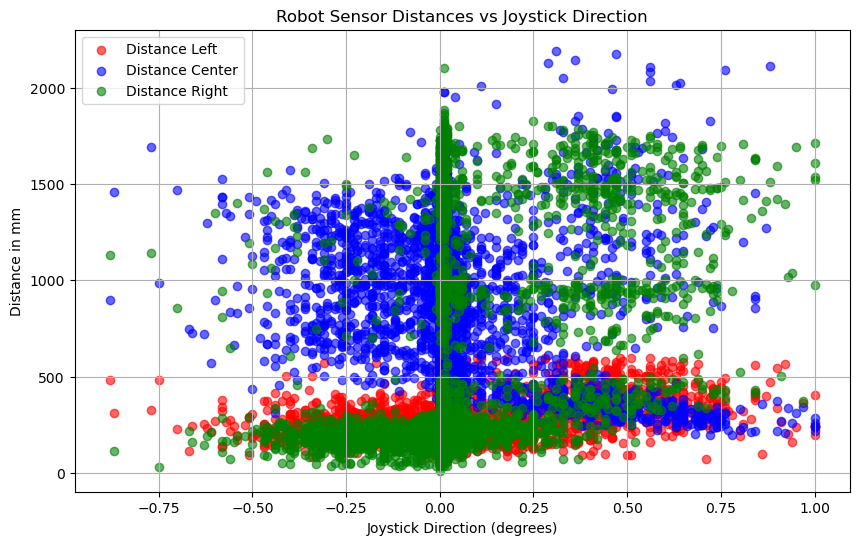

In [18]:
# Create scatter plot
plt.figure(figsize=(10, 6))

plt.scatter(cleandf['joystick_direction'], cleandf['distance_L'], color='red', label='Distance Left', alpha=0.6)
plt.scatter(cleandf['joystick_direction'], cleandf['distance_C'], color='blue', label='Distance Center', alpha=0.6)
plt.scatter(cleandf['joystick_direction'], cleandf['distance_R'], color='green', label='Distance Right', alpha=0.6)

plt.title('Robot Sensor Distances vs Joystick Direction')
plt.xlabel('Joystick Direction (degrees)')
plt.ylabel('Distance in mm')
plt.legend()
plt.grid()
plt.show()

# *** All runs below are with filtered data ***

# Linear Regression Model with cleaned data

Mean Squared Error: 0.03505500404938281
Mean Absolute Error: 0.12549222460048612
R^2 Score: 0.2514383372642961

Sample Predictions vs Actual Values:
Predicted: -0.0109, Actual: 0.0100
Predicted: -0.0028, Actual: 0.0100
Predicted: 0.1125, Actual: 0.4800
Predicted: -0.0250, Actual: -0.3600
Predicted: -0.0694, Actual: -0.0100
Predicted: -0.0725, Actual: -0.2100
Predicted: 0.1925, Actual: 0.0600
Predicted: 0.0188, Actual: -0.1800
Predicted: 0.1735, Actual: 0.0000
Predicted: 0.3398, Actual: 0.8400


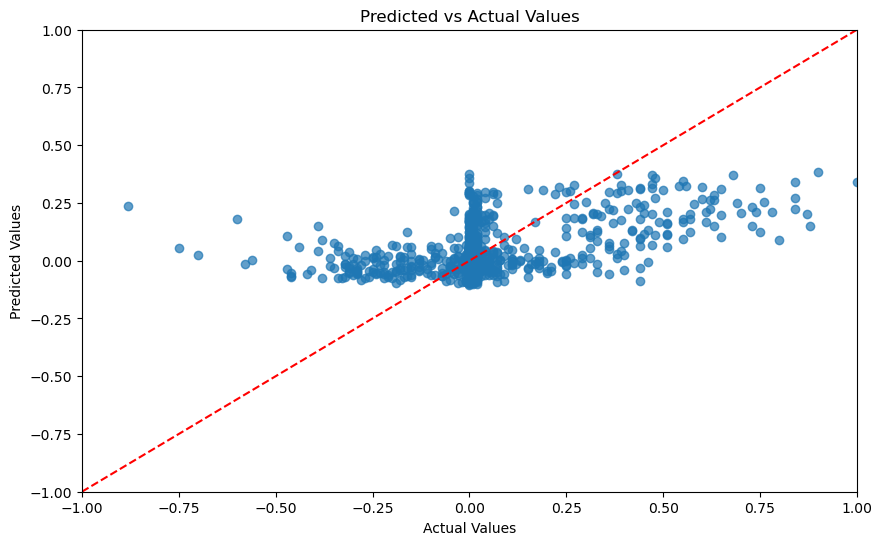

In [19]:
LR_testdata = cleandf.copy()

# Define features and target

#####  features with and without timestamp & joiystick_throttle columns
#features = LR_testdata[['timestamp', 'joystick_throttle','distance_L', 'distance_C', 'distance_R']]
features = LR_testdata[['distance_L', 'distance_C', 'distance_R']]
my_target = LR_testdata['joystick_direction']  # column to be excluded from X_test, y_test -->will only contain features

# Split data into training and test sets\
# my_target indicates column to predict based on value from X_test for joystick_direction to drive the robot
# y_train holds joystick_direction values for the training sample
# y_test stores the original joystick_direction values for portion of df set aside for testing
X_train, X_test, y_train, y_test = train_test_split(features, my_target, test_size=0.2, random_state=42)

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

y_pred = LR_model.predict(X_test)

# Evaluate the model by comparing:
# actual joystick_direction(y_test) with predicted y_pred values
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Output predictions vs actual values
print("\nSample Predictions vs Actual Values:")
for i in range(min(10, len(y_pred))):  # Print the first 10 predictions    
    print(f"Predicted: {y_pred[i]:.4f}, Actual: {y_test.iloc[i]:.4f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([-1, 1], [-1, 1], 'r--')  # Line for perfect predictions
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(-1, 1)  # based on target variable range -1 to 1
plt.ylim(-1, 1)
plt.show()

# Random Forrest with cleaned data


In [20]:


# 'clean_robotdf' is the DataFrame
# Define features and target

testdata = cleandf.copy()

# 'robotdf_2' is original DataFrame which was cleaned of all outlier sensor distances
# Define features and target

features = testdata[['distance_L', 'distance_C', 'distance_R']]
#features = testdata[['timestamp', 'joystick_throttle','distance_L', 'distance_C', 'distance_R']]
target = testdata['joystick_direction']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

######################################################################
#
#   this save to a usable model: .pkl file
#
#   file is: robot_rf_regressor_model.pkl
#
# Save the model to a .pkl file
#
#     Uncomment below to save the pickle file

with open('RFR_model_April.pkl', 'wb') as model_file:    
    pickle.dump(rf_model, model_file)
print("Model saved as 'RFR_model_final.pkl'")

#
#
#######################################################################

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Feature importance (a nice additional insight)
feature_importances = rf_model.feature_importances_
features_list = features.columns
print("\nFeature Importances:")
for feature, importance in zip(features_list, feature_importances):
    print(f"{feature}: {importance:.2f}")
    
# Sample Predictions vs Actual Values
print("\nSample Predictions vs Actual Values:")
print()
predictions_df = pd.DataFrame({'Predicted': y_pred[:20], 'Actual': y_test.iloc[:20]})
print(predictions_df)
print()

Model saved as 'RFR_model_final.pkl'
Mean Squared Error: 0.027895616315789473
Mean Absolute Error: 0.1107953947368421
R^2 Score: 0.4043193119313805

Feature Importances:
distance_L: 0.22
distance_C: 0.49
distance_R: 0.30

Sample Predictions vs Actual Values:

      Predicted  Actual
503     -0.0861    0.01
3975    -0.1157    0.01
23       0.2277    0.48
2885    -0.0563   -0.36
138      0.0154   -0.01
1516    -0.1316   -0.21
1348     0.0584    0.06
2548    -0.0229   -0.18
3449     0.1359    0.00
4108     0.2328    0.84
4579     0.0062    0.02
3566     0.0046    0.00
3366    -0.0278    0.01
4618    -0.0453    0.01
2347    -0.0954   -0.24
1988     0.2498    0.57
4814     0.1790    0.02
3561    -0.0212    0.00
928      0.1217    0.02
3829    -0.0338    0.00



# Random Forrest Scatter Plot on cleaned data

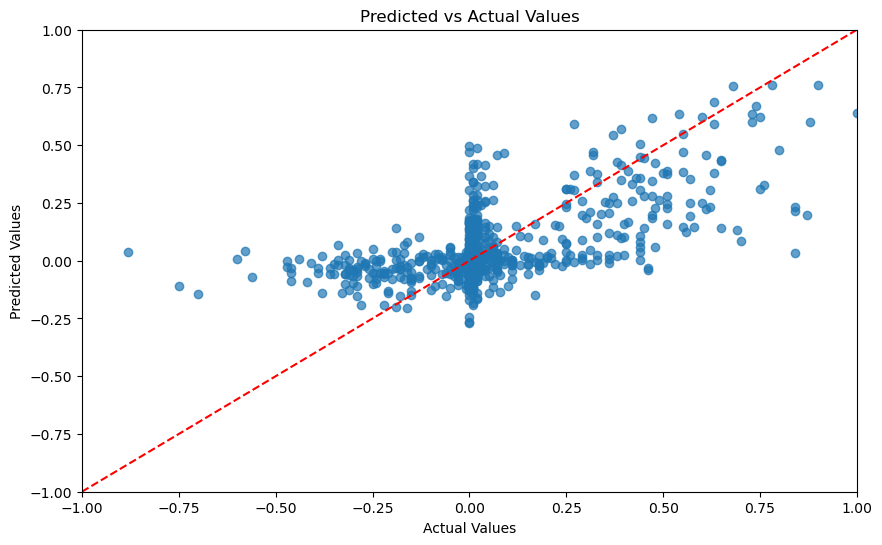

In [21]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([-1, 1], [-1, 1], 'r--')  # Line for perfect predictions
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(-1, 1)  # based on target variable range -1 to 1
plt.ylim(-1, 1)
plt.show()

# K-fold Cross-Validation

In [22]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-validated R²: {np.mean(cv_scores)}')


Cross-validated R²: 0.3936641943806409


# Gradient Boosting Regressor Model

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
# Define features and target

testdata = cleandf.copy()


# 'robotdf' is original DataFrame
# Define features and target

#####  features with and without timestamp & joiystick_throttle columns
#features = robotdf_testdata[['timestamp', 'joystick_throttle','distance_L', 'distance_C', 'distance_R']]
features = testdata[['distance_L', 'distance_C', 'distance_R']]
my_target = testdata['joystick_direction']  # column to be excluded from X_test, y_test -->will only contains features

# Split data into training and test sets\
# my_target indicates column to predict based on value from X_test for joystick_direction to drive the robot
# y_train holds joystick_direction values for the training sample
# y_test stores the original joystick_direction values for portion of df set aside for testing
X_train, X_test, y_train, y_test = train_test_split(features, my_target, test_size=0.2, random_state=42)

# Define the model
GBRmodel = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

GBRmodel.fit(X_train, y_train)

# Predict on the test data
y_pred = GBRmodel.predict(X_test)

# Evaluate the model performance using cross-validation
cv_scores = cross_val_score(GBRmodel, X_train, y_train, cv=5, scoring='r2')

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Feature importance (a nice additional insight)
feature_importances = GBRmodel.feature_importances_
features_list = features.columns

print("\nFeature Importances:")
for feature, importance in zip(features_list, feature_importances):
    print(f"{feature}: {importance:.2f}")

# Sample Predictions vs Actual Values
print("\nSample Predictions vs Actual Values:")
print()
predictions_df = pd.DataFrame({'Predicted': y_pred[:20], 'Actual': y_test.iloc[:20]})
print(predictions_df)
print()
# Print the average cross-validated R² score
print(f'Cross-validated R²: {np.mean(cv_scores):.4f}')


Mean Squared Error: 0.027775131932026412
Mean Absolute Error: 0.10737098704993406
R^2 Score: 0.4068921255164626

Feature Importances:
distance_L: 0.16
distance_C: 0.65
distance_R: 0.19

Sample Predictions vs Actual Values:

      Predicted  Actual
503   -0.022010    0.01
3975  -0.023611    0.01
23     0.283458    0.48
2885  -0.032877   -0.36
138   -0.002681   -0.01
1516  -0.103143   -0.21
1348   0.099989    0.06
2548  -0.030820   -0.18
3449   0.127487    0.00
4108   0.249763    0.84
4579   0.013054    0.02
3566  -0.005831    0.00
3366  -0.014542    0.01
4618  -0.046371    0.01
2347  -0.140749   -0.24
1988   0.089271    0.57
4814   0.186406    0.02
3561  -0.032566    0.00
928    0.019837    0.02
3829  -0.028791    0.00

Cross-validated R²: 0.4140


# Scatter Plot Predicted vs Actual Direction

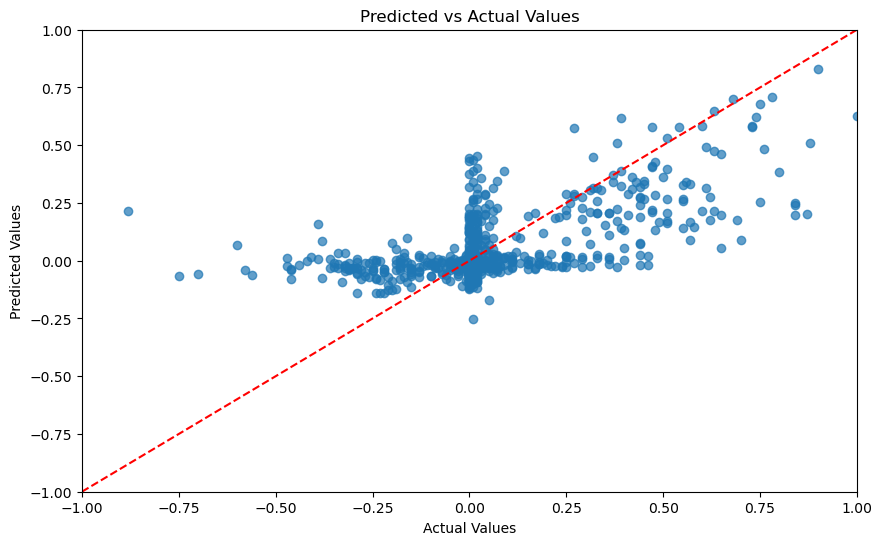

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([-1, 1], [-1, 1], 'r--')  # Line for perfect predictions
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(-1, 1)  # based on your target variable's range -1 to 1
plt.ylim(-1, 1)
plt.show()


### Early Stopping ... can help with overfitting when validation set performance stops improving ... no improvement ... R^2 is worse

In [26]:

X_train_set, X_val_set, y_train_set, y_val_set = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the model with early stopping
model_with_early_stopping = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=5)
model_with_early_stopping.fit(X_train_set, y_train_set)
best_n_estimators = model_with_early_stopping.n_estimators_

# Evaluate on validation set
val_score = model_with_early_stopping.score(X_val_set, y_val_set)
print(f'Validation R² score: {val_score}')


Validation R² score: 0.23127192149635423


# XGRegressor Model

In [27]:
from xgboost import XGBRegressor


xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test)


with open('xgb_model.pkl', 'wb') as model_file:    
    pickle.dump(xgb_model, model_file)
print("Model saved as 'xgb_model.pkl'")

# Feature importance (a nice additional insight)
feature_importances = xgb_model.feature_importances_
features_list = features.columns

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


print("\nFeature Importances:")
for feature, importance in zip(features_list, feature_importances):
    print(f"{feature}: {importance:.2f}")
print()

# Sample Predictions vs Actual Values
print("\nSample Predictions vs Actual Values:")
print()
predictions_df = pd.DataFrame({'Predicted': y_pred[:20], 'Actual': y_test.iloc[:20]})
print(predictions_df)
print()

# Print the average cross-validated R² score
print(f'Cross-validated R²: {np.mean(cv_scores)}')

cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-validated R² for XGBoost: {np.mean(cv_scores)}')


Model saved as 'xgb_model.pkl'
Mean Squared Error: 0.029296770652515555
Mean Absolute Error: 0.11063612819779928
R^2 Score: 0.37439917788799315

Feature Importances:
distance_L: 0.15
distance_C: 0.59
distance_R: 0.25


Sample Predictions vs Actual Values:

      Predicted  Actual
503   -0.029058    0.01
3975  -0.085877    0.01
23     0.373839    0.48
2885  -0.035074   -0.36
138   -0.018371   -0.01
1516  -0.145992   -0.21
1348   0.097111    0.06
2548  -0.034283   -0.18
3449   0.100479    0.00
4108   0.267812    0.84
4579   0.005492    0.02
3566  -0.008508    0.00
3366  -0.016983    0.01
4618  -0.020981    0.01
2347  -0.079597   -0.24
1988   0.146604    0.57
4814   0.201018    0.02
3561  -0.044218    0.00
928    0.021516    0.02
3829  -0.023530    0.00

Cross-validated R²: 0.41401216092117143
Cross-validated R² for XGBoost: 0.39301406145923423


# Scatter Plot Predicted vs Actual Directon

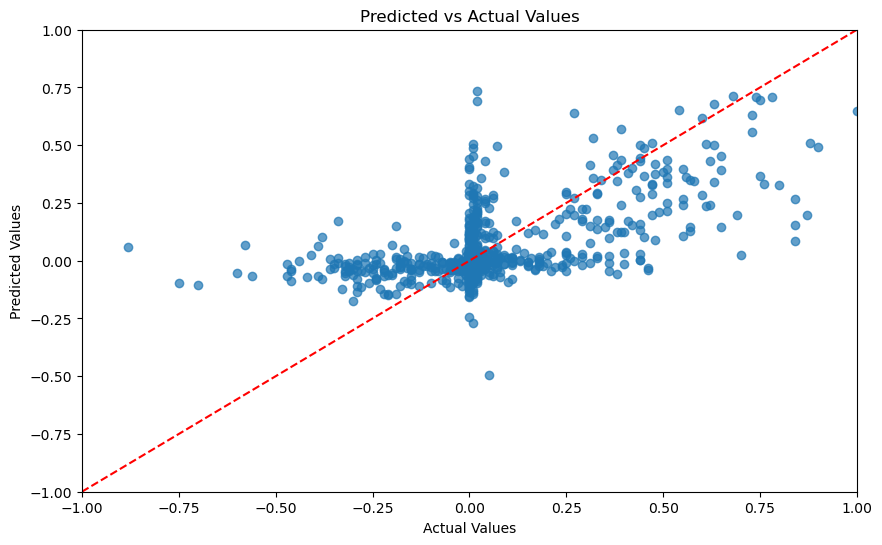

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([-1, 1], [-1, 1], 'r--')  # Line for perfect predictions
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(-1, 1)  # based on your target variable's range -1 to 1
plt.ylim(-1, 1)
plt.show()


# Model Stacking

In [29]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

estimators = [
    ('rf', RandomForestRegressor(n_estimators=100)),
    ('gb', GradientBoostingRegressor(n_estimators=100))
]

stacked_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacked_model.fit(X_train, y_train)

# Predict on the test data
y_pred = stacked_model.predict(X_test)


with open('stacked_model.pkl', 'wb') as model_file:    
    pickle.dump(stacked_model, model_file)
print("Model saved as 'stacked_model.pkl'")


# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


# Sample Predictions vs Actual Values
print("\nSample Predictions vs Actual Values:")
print()
predictions_df = pd.DataFrame({'Predicted': y_pred[:20], 'Actual': y_test.iloc[:20]})
print(predictions_df)
print()

# Evaluate the stacked model
stacked_cv_scores = cross_val_score(stacked_model, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-validated R² for Stacked Model: {np.mean(stacked_cv_scores)}')
print()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')


Model saved as 'stacked_model.pkl'
Mean Squared Error: 0.027296495646347084
Mean Absolute Error: 0.10614593099939533
R^2 Score: 0.4171128852501951

Sample Predictions vs Actual Values:

      Predicted  Actual
503   -0.041836    0.01
3975  -0.042072    0.01
23     0.267394    0.48
2885  -0.037293   -0.36
138    0.007335   -0.01
1516  -0.087266   -0.21
1348   0.096869    0.06
2548  -0.029574   -0.18
3449   0.103863    0.00
4108   0.206791    0.84
4579   0.015176    0.02
3566  -0.004971    0.00
3366  -0.023487    0.01
4618  -0.026544    0.01
2347  -0.097298   -0.24
1988   0.143439    0.57
4814   0.203349    0.02
3561  -0.022480    0.00
928    0.060229    0.02
3829  -0.017222    0.00

Cross-validated R² for Stacked Model: 0.43203339227370013

Mean Absolute Error (MAE): 0.1061
Mean Squared Error (MSE): 0.0273


# Scatter Plot for Model Stacking

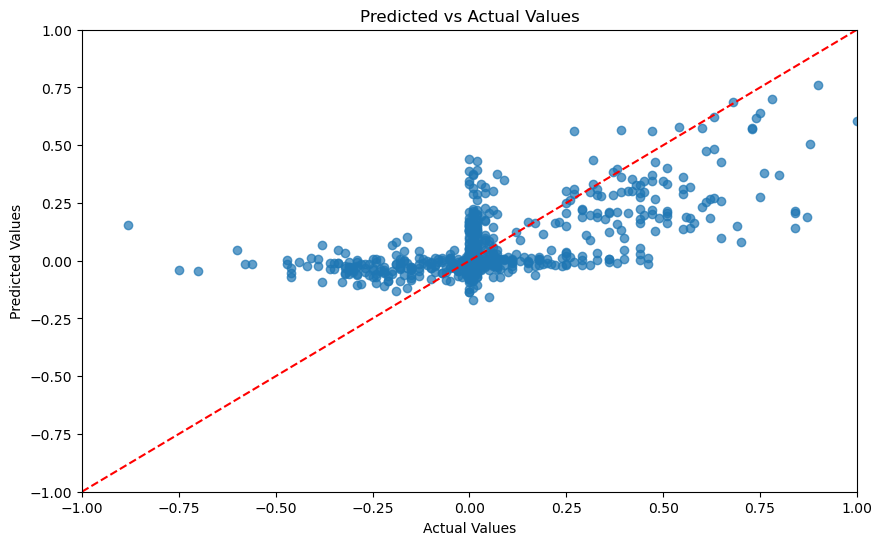

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([-1, 1], [-1, 1], 'r--')  # Line for perfect predictions
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(-1, 1)  # Depending on your value range, adjust if needed
plt.ylim(-1, 1)
plt.show()

# Stacked Model Evaluation

In [31]:
stacked_model = StackingRegressor(estimators=[('rf', RandomForestRegressor(n_estimators=100)), 
                                                ('gb', GradientBoostingRegressor(n_estimators=100))], 
                                   final_estimator=LinearRegression())

stacked_model.fit(X_train, y_train)

test_r_squared_stacked = stacked_model.score(X_test, y_test)
print(f'Test R² score for Stacked Model: {test_r_squared_stacked}')


Test R² score for Stacked Model: 0.4148209762154902


# Residual analysis of stacked model

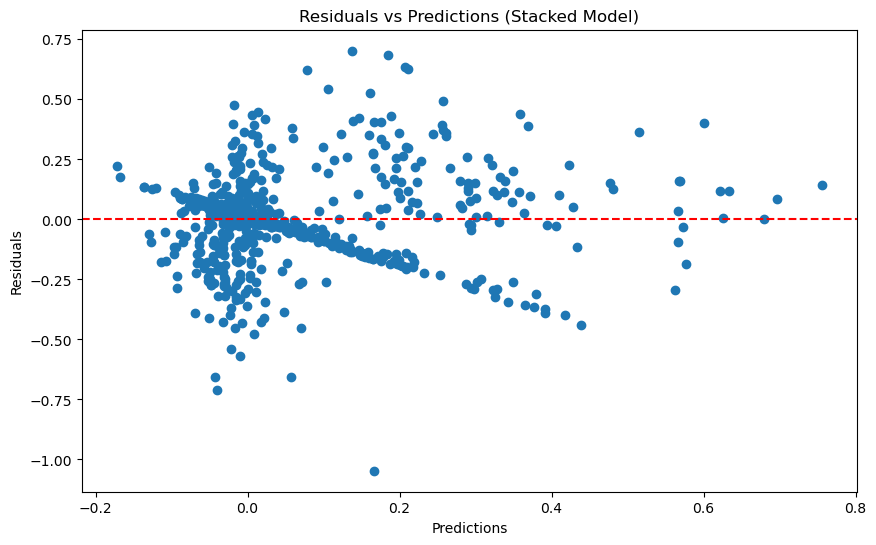

In [32]:
stacked_predictions = stacked_model.predict(X_test)
residuals_stacked = y_test - stacked_predictions

plt.figure(figsize=(10, 6))
plt.scatter(stacked_predictions, residuals_stacked)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predictions (Stacked Model)')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

# Neural Network

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [34]:
# robotdf_2 DataFrame
# Define the split index (80% for training, 20% for testing)
split_index = int(len(cleandf) * 0.8)

# Prepare the features and target
features = cleandf[['distance_L', 'distance_C', 'distance_R']]
target = cleandf['joystick_direction']

# Split the data without shuffling
X_train = features.iloc[:split_index]
X_test = features.iloc[split_index:]
y_train = target.iloc[:split_index]
y_test = target.iloc[split_index:]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Neural Network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1))  # Output layer (1 output for regression)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=1)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

Epoch 1/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 0.0381
Epoch 2/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 0.0308
Epoch 3/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 0.0297
Epoch 4/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 0.0295
Epoch 5/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 0.0266
Epoch 6/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 0.0279
Epoch 7/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 0.0277
Epoch 8/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 0.0283
Epoch 9/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 0.0263
Epoch 10/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 0.0270
Epoch 11/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 0.0266
Epoch 12/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 0.0287
Epoch 13/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 0.0233
Epoch 14/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 0.0247
Epoch 15/100
36

# Neural Network Scatter Plot: Predicted vs Actual direction commands

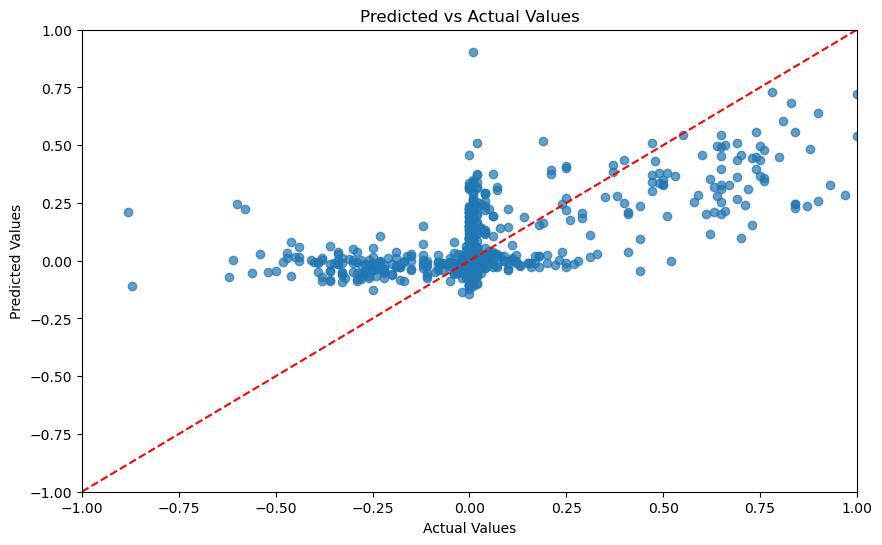

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([-1, 1], [-1, 1], 'r--')  # Line for perfect predictions
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(-1, 1)  # Depending on your value range, adjust if needed
plt.ylim(-1, 1)
plt.show()